In [1]:
from scripts.get_data import get_processed_data
from scripts.models import VotingClassifier

In [2]:
# logistic regression
from sklearn.linear_model import LogisticRegression 
# elastic net 
from sklearn.linear_model import ElasticNet
# svm classifier
from sklearn.svm import SVC
# lda 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

data, labels = get_processed_data(corr_thresh=0.9, minmax_scale=True, var_thresh=0.01, k_to_select=1000)

In [4]:
from timeit import default_timer as timer   

## Ensemble model

This uses an implementation of the ensemble model as described in the paper. This is so that we can use this as a baseline to make comparisons.

In [4]:
model = VotingClassifier(20, SVC(kernel='linear'))
model.train(data.values, labels)
predictions = model.predict(data.values)

In [5]:
from sklearn.metrics import mean_absolute_error, accuracy_score

mean_absolute_error(labels, predictions), accuracy_score(labels, predictions)

(0.0, 1.0)

We have 100% accuracy on the training data when the `N` different models are all `SVC()`. 

## Leave One Out scoring

In [52]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression

splitter = LeaveOneOut()
true_labels = []
pred_labels = []
base_estimator = LDA(solver='eigen', shrinkage='auto')
# base_estimator = LogisticRegression()
train_time, eval_time = 0.0, 0.0

for fold, (train_ind, val_ind) in enumerate(splitter.split(data)):
    model = VotingClassifier(20, base_estimator)
    # model = LinearRegression()
    # model = LogisticRegression()
    # model = LDA(solver='eigen', shrinkage='auto')
    train_timer = timer()
    model.train(data.iloc[train_ind], labels.iloc[train_ind])
    train_time += timer() - train_timer
    eval_timer = timer()
    pred = model.predict(data.iloc[val_ind]).reshape(-1,)
    eval_time += timer() - eval_timer
    true_labels.append(labels.iloc[val_ind].values[0])
    pred_labels.append(pred[0])
    print(f'[Fold {fold+1}/{splitter.get_n_splits(data)}] ==> True label: {true_labels[-1]}, Prediction: {pred_labels[-1]}')

print(f'Average train time: {(train_time / splitter.get_n_splits(data)):.6f} s, average eval time: {(eval_time / splitter.get_n_splits(data)):.6f} s')

/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 1/133] ==> True label: 19, Prediction: 33


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 2/133] ==> True label: 19, Prediction: 29


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 3/133] ==> True label: 19, Prediction: 22


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 4/133] ==> True label: 19, Prediction: 19


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 5/133] ==> True label: 20, Prediction: 19


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 6/133] ==> True label: 20, Prediction: 30


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 7/133] ==> True label: 31, Prediction: 20


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 8/133] ==> True label: 31, Prediction: 29


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 9/133] ==> True label: 32, Prediction: 19


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 10/133] ==> True label: 32, Prediction: 42


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 11/133] ==> True label: 33, Prediction: 19


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 12/133] ==> True label: 33, Prediction: 52


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 13/133] ==> True label: 37, Prediction: 23


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 14/133] ==> True label: 37, Prediction: 33


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 15/133] ==> True label: 37, Prediction: 70


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 16/133] ==> True label: 39, Prediction: 37


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 17/133] ==> True label: 51, Prediction: 57


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 18/133] ==> True label: 52, Prediction: 33


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 19/133] ==> True label: 55, Prediction: 25


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 20/133] ==> True label: 57, Prediction: 43


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 21/133] ==> True label: 60, Prediction: 80


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 22/133] ==> True label: 71, Prediction: 39


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 23/133] ==> True label: 75, Prediction: 57


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 24/133] ==> True label: 78, Prediction: 31


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 25/133] ==> True label: 80, Prediction: 37


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/

[Fold 26/133] ==> True label: 94, Prediction: 89


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 27/133] ==> True label: 89, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 28/133] ==> True label: 87, Prediction: 89


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 29/133] ==> True label: 90, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 30/133] ==> True label: 89, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 31/133] ==> True label: 86, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 32/133] ==> True label: 92, Prediction: 91


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 33/133] ==> True label: 87, Prediction: 90


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/

[Fold 34/133] ==> True label: 1, Prediction: 17


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 35/133] ==> True label: 12, Prediction: 26


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 36/133] ==> True label: 22, Prediction: 24


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 37/133] ==> True label: 25, Prediction: 21


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 38/133] ==> True label: 29, Prediction: 20


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 39/133] ==> True label: 24, Prediction: 29


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 40/133] ==> True label: 23, Prediction: 22


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 41/133] ==> True label: 26, Prediction: 20


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 42/133] ==> True label: 21, Prediction: 19


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 43/133] ==> True label: 24, Prediction: 17


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 44/133] ==> True label: 67, Prediction: 61


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 45/133] ==> True label: 67, Prediction: 68


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 46/133] ==> True label: 68, Prediction: 21


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 47/133] ==> True label: 82, Prediction: 64


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 48/133] ==> True label: 66, Prediction: 22


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 49/133] ==> True label: 68, Prediction: 66


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 50/133] ==> True label: 70, Prediction: 78


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 51/133] ==> True label: 69, Prediction: 25


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 52/133] ==> True label: 25, Prediction: 44


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 53/133] ==> True label: 25, Prediction: 29


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 54/133] ==> True label: 26, Prediction: 24


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 55/133] ==> True label: 26, Prediction: 37


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 56/133] ==> True label: 28, Prediction: 30


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 57/133] ==> True label: 29, Prediction: 30


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 58/133] ==> True label: 29, Prediction: 26


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 59/133] ==> True label: 30, Prediction: 28


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 60/133] ==> True label: 30, Prediction: 30


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 61/133] ==> True label: 30, Prediction: 30


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 62/133] ==> True label: 30, Prediction: 28


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 63/133] ==> True label: 43, Prediction: 47


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 64/133] ==> True label: 44, Prediction: 50


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 65/133] ==> True label: 41, Prediction: 46


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 66/133] ==> True label: 47, Prediction: 41


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 67/133] ==> True label: 50, Prediction: 68


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 68/133] ==> True label: 46, Prediction: 45


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 69/133] ==> True label: 50, Prediction: 67


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 70/133] ==> True label: 42, Prediction: 37


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 71/133] ==> True label: 47, Prediction: 50


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 72/133] ==> True label: 41, Prediction: 57


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 73/133] ==> True label: 43, Prediction: 61


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 74/133] ==> True label: 44, Prediction: 66


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 75/133] ==> True label: 45, Prediction: 47


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 76/133] ==> True label: 46, Prediction: 51


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 77/133] ==> True label: 46, Prediction: 44


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 78/133] ==> True label: 47, Prediction: 41


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 79/133] ==> True label: 61, Prediction: 66


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 80/133] ==> True label: 62, Prediction: 33


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 81/133] ==> True label: 62, Prediction: 68


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 82/133] ==> True label: 63, Prediction: 46


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 83/133] ==> True label: 64, Prediction: 47


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 84/133] ==> True label: 66, Prediction: 68


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 85/133] ==> True label: 67, Prediction: 66


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 86/133] ==> True label: 67, Prediction: 47


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 87/133] ==> True label: 68, Prediction: 48


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 88/133] ==> True label: 68, Prediction: 61


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 89/133] ==> True label: 69, Prediction: 49


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 90/133] ==> True label: 69, Prediction: 67


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 91/133] ==> True label: 83, Prediction: 84


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 92/133] ==> True label: 83, Prediction: 84


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 93/133] ==> True label: 83, Prediction: 84


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 94/133] ==> True label: 84, Prediction: 84


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 95/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 96/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 97/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 98/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 99/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 100/133] ==> True label: 84, Prediction: 83


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 101/133] ==> True label: 86, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 102/133] ==> True label: 86, Prediction: 90


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 103/133] ==> True label: 86, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 104/133] ==> True label: 87, Prediction: 89


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 105/133] ==> True label: 87, Prediction: 86


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 106/133] ==> True label: 87, Prediction: 86


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 107/133] ==> True label: 87, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 108/133] ==> True label: 88, Prediction: 82


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 109/133] ==> True label: 89, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 110/133] ==> True label: 90, Prediction: 88


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 111/133] ==> True label: 91, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 112/133] ==> True label: 92, Prediction: 90


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 113/133] ==> True label: 96, Prediction: 87


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/

[Fold 114/133] ==> True label: 1, Prediction: 7


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 115/133] ==> True label: 2, Prediction: 11


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 116/133] ==> True label: 3, Prediction: 6


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 117/133] ==> True label: 3, Prediction: 10


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 118/133] ==> True label: 5, Prediction: 9


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 119/133] ==> True label: 6, Prediction: 7


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 120/133] ==> True label: 7, Prediction: 6


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 121/133] ==> True label: 7, Prediction: 8


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 122/133] ==> True label: 8, Prediction: 20


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 123/133] ==> True label: 8, Prediction: 10


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 124/133] ==> True label: 9, Prediction: 13


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 125/133] ==> True label: 10, Prediction: 8


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 126/133] ==> True label: 10, Prediction: 7


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 127/133] ==> True label: 11, Prediction: 7


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 128/133] ==> True label: 11, Prediction: 12


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 129/133] ==> True label: 12, Prediction: 20


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 130/133] ==> True label: 13, Prediction: 17


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 131/133] ==> True label: 16, Prediction: 21


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 132/133] ==> True label: 17, Prediction: 8


/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_shrunk_covariance.py:237: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/home/balakrishnan/.local/lib/python3.10/site-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


[Fold 133/133] ==> True label: 17, Prediction: 12
Average train time: 21.240060 s, average eval time: 0.233954 s


In [53]:
import numpy as np

mean_error = mean_absolute_error(np.array(true_labels), np.array(pred_labels))
median_error = median_absolute_error(np.array(true_labels), np.array(pred_labels))
mean_error, median_error

(8.323308270676693, 4.0)

In [54]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(true_labels), np.array(pred_labels))
r2

0.7895022982493451

Text(0, 0.5, 'Predictions')

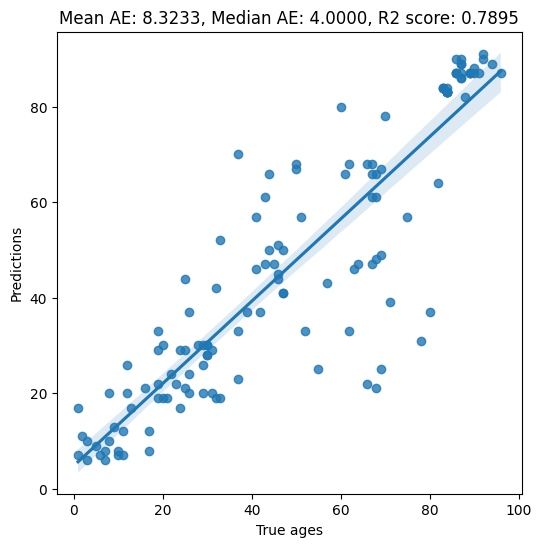

In [55]:
from seaborn import regplot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
regplot(x=true_labels, y=pred_labels)
plt.title(f'Mean AE: {mean_error:.4f}, Median AE: {median_error:.4f}, R2 score: {r2:.4f}')
plt.xlabel('True ages')
plt.ylabel('Predictions')

In [19]:
coefs = np.abs(model.coef_)
coefs.sort()
coefs

array([5.45044700e-05, 8.70455709e-05, 1.15935181e-04, ...,
       2.11463871e+00, 2.25569893e+00, 2.34520181e+00])

In [20]:
coefs[-10:]

array([1.7042112 , 1.73475889, 1.74589329, 1.77024618, 1.77759588,
       1.77976944, 1.95872393, 2.11463871, 2.25569893, 2.34520181])